# Introduction to Pandas in Python

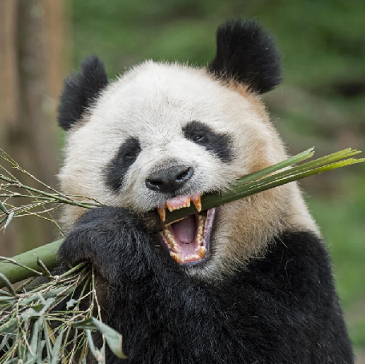

## Be Sure to Review the Documentation
### 10 Minutes to Pandas
https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#min

## Data Structure

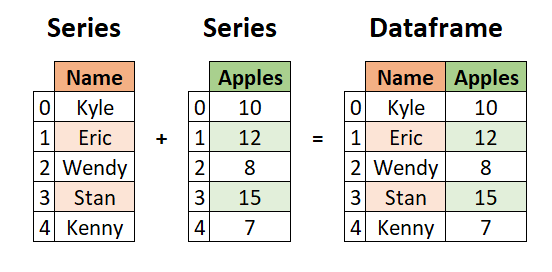

# 1. Load Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 2. Load Data from Excel

## Fall Semester Grades
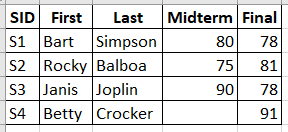

In [2]:
falldata = pd.read_excel('Pandas_Data.xlsx', sheet_name='Fall Students')
falldata

,SID,First,Last,Midterm,Final
0,S1,Bart,Simpson,80.0,78
1,S2,Rocky,Balboa,75.0,81
2,S3,Janis,Joplin,90.0,88
3,S4,Betty,Crocker,NaN,81


In [3]:
falldata.dtypes

SID         object
First       object
Last        object
Midterm    float64
Final        int64
dtype: object

## Spring Semester Grades
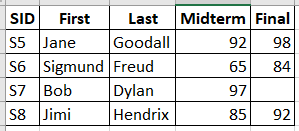

In [4]:
springdata = pd.read_excel('Pandas_Data.xlsx', sheet_name='Spring Students')
springdata

,SID,First,Last,Midterm,Final
0,S5,Jane,Goodall,92,98.0
1,S6,Sigmund,Freud,65,84.0
2,S7,Bob,Dylan,97,NaN
3,S8,Jimi,Hendrix,85,83.0


In [5]:
springdata.dtypes

SID         object
First       object
Last        object
Midterm      int64
Final      float64
dtype: object

## Student Survey Data
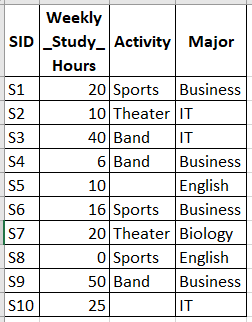

In [6]:
surveydata = pd.read_excel('Pandas_Data.xlsx', sheet_name='Student Survey')
surveydata

,SID,Study_Hours,Activity,Major
0,S1,20,Sports,Business
1,S2,10,Theater,IT
2,S3,40,Band,NaN
3,S4,6,Band,Business
4,S5,25,NaN,English
5,S6,16,Sports,Business
6,S7,20,Theater,Biology
7,S8,0,Sports,English
8,S9,50,Band,Business
9,S10,25,NaN,IT


In [7]:
surveydata.dtypes

SID            object
Study_Hours     int64
Activity       object
Major          object
dtype: object

# <font color='red'>Try It!</font>
## Load Summer Students Tab from Excel

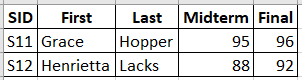

In [8]:
summerdata = pd.read_excel('Pandas_Data.xlsx', sheet_name='Summer Students')
summerdata

,SID,First,Last,Midterm,Final
0,S11,Grace,Hopper,95,96
1,S12,Henrietta,Lacks,88,92


In [9]:
summerdata.dtypes

SID        object
First      object
Last       object
Midterm     int64
Final       int64
dtype: object

# 3. Combine Data

## Concatenate Semesters

In [10]:
gradedata = pd.concat([falldata,springdata])
gradedata

,SID,First,Last,Midterm,Final
0,S1,Bart,Simpson,80.0,78.0
1,S2,Rocky,Balboa,75.0,81.0
2,S3,Janis,Joplin,90.0,88.0
3,S4,Betty,Crocker,NaN,81.0
0,S5,Jane,Goodall,92.0,98.0
1,S6,Sigmund,Freud,65.0,84.0
2,S7,Bob,Dylan,97.0,NaN
3,S8,Jimi,Hendrix,85.0,83.0


## Reset Index

In [11]:
gradedata.reset_index(drop=True, inplace=True)
gradedata

,SID,First,Last,Midterm,Final
0,S1,Bart,Simpson,80.0,78.0
1,S2,Rocky,Balboa,75.0,81.0
2,S3,Janis,Joplin,90.0,88.0
3,S4,Betty,Crocker,NaN,81.0
4,S5,Jane,Goodall,92.0,98.0
5,S6,Sigmund,Freud,65.0,84.0
6,S7,Bob,Dylan,97.0,NaN
7,S8,Jimi,Hendrix,85.0,83.0


In [12]:
gradedata.dtypes

SID         object
First       object
Last        object
Midterm    float64
Final      float64
dtype: object

# <font color='red'>Try It!</font>
## Concatenate Summer Data and Reset Index

In [13]:
gradedata = pd.concat([gradedata,summerdata])
gradedata.reset_index(drop=True, inplace=True)
gradedata

,SID,First,Last,Midterm,Final
0,S1,Bart,Simpson,80.0,78.0
1,S2,Rocky,Balboa,75.0,81.0
2,S3,Janis,Joplin,90.0,88.0
3,S4,Betty,Crocker,NaN,81.0
4,S5,Jane,Goodall,92.0,98.0
5,S6,Sigmund,Freud,65.0,84.0
6,S7,Bob,Dylan,97.0,NaN
7,S8,Jimi,Hendrix,85.0,83.0
8,S11,Grace,Hopper,95.0,96.0
9,S12,Henrietta,Lacks,88.0,92.0


# 4. Summarize Data Distribution

In [14]:
gradedata.mean()

Midterm    85.222222
Final      86.777778
dtype: float64

In [15]:
gradedata.median()

Midterm    88.0
Final      84.0
dtype: float64

# 5. Impute Missing Grade Data

In [16]:
gradedata.isna().sum()

SID        0
First      0
Last       0
Midterm    1
Final      1
dtype: int64

In [17]:
gradedata.fillna((gradedata.median()), inplace=True)
gradedata

,SID,First,Last,Midterm,Final
0,S1,Bart,Simpson,80.0,78.0
1,S2,Rocky,Balboa,75.0,81.0
2,S3,Janis,Joplin,90.0,88.0
3,S4,Betty,Crocker,88.0,81.0
4,S5,Jane,Goodall,92.0,98.0
5,S6,Sigmund,Freud,65.0,84.0
6,S7,Bob,Dylan,97.0,84.0
7,S8,Jimi,Hendrix,85.0,83.0
8,S11,Grace,Hopper,95.0,96.0
9,S12,Henrietta,Lacks,88.0,92.0


In [18]:
gradedata.dtypes

SID         object
First       object
Last        object
Midterm    float64
Final      float64
dtype: object

# 6. Merge Survey Data

## Outer Join

In [19]:
alldata = pd.merge(gradedata, surveydata, left_on='SID',right_on='SID', how = 'outer')
alldata

,SID,First,Last,Midterm,Final,Study_Hours,Activity,Major
0,S1,Bart,Simpson,80.0,78.0,20,Sports,Business
1,S2,Rocky,Balboa,75.0,81.0,10,Theater,IT
2,S3,Janis,Joplin,90.0,88.0,40,Band,NaN
3,S4,Betty,Crocker,88.0,81.0,6,Band,Business
4,S5,Jane,Goodall,92.0,98.0,25,NaN,English
5,S6,Sigmund,Freud,65.0,84.0,16,Sports,Business
6,S7,Bob,Dylan,97.0,84.0,20,Theater,Biology
7,S8,Jimi,Hendrix,85.0,83.0,0,Sports,English
8,S11,Grace,Hopper,95.0,96.0,22,Sports,Biology
9,S12,Henrietta,Lacks,88.0,92.0,28,Theater,English


## Drop NaNs

In [20]:
alldata.isna().sum()

SID            0
First          2
Last           2
Midterm        2
Final          2
Study_Hours    0
Activity       2
Major          1
dtype: int64

In [21]:
alldata.dropna(inplace=True)
alldata

,SID,First,Last,Midterm,Final,Study_Hours,Activity,Major
0,S1,Bart,Simpson,80.0,78.0,20,Sports,Business
1,S2,Rocky,Balboa,75.0,81.0,10,Theater,IT
3,S4,Betty,Crocker,88.0,81.0,6,Band,Business
5,S6,Sigmund,Freud,65.0,84.0,16,Sports,Business
6,S7,Bob,Dylan,97.0,84.0,20,Theater,Biology
7,S8,Jimi,Hendrix,85.0,83.0,0,Sports,English
8,S11,Grace,Hopper,95.0,96.0,22,Sports,Biology
9,S12,Henrietta,Lacks,88.0,92.0,28,Theater,English


## Left Join - Our Better Join

In [22]:
alldata = pd.merge(gradedata, surveydata, left_on='SID',right_on='SID', how = 'left')
alldata

,SID,First,Last,Midterm,Final,Study_Hours,Activity,Major
0,S1,Bart,Simpson,80.0,78.0,20,Sports,Business
1,S2,Rocky,Balboa,75.0,81.0,10,Theater,IT
2,S3,Janis,Joplin,90.0,88.0,40,Band,NaN
3,S4,Betty,Crocker,88.0,81.0,6,Band,Business
4,S5,Jane,Goodall,92.0,98.0,25,NaN,English
5,S6,Sigmund,Freud,65.0,84.0,16,Sports,Business
6,S7,Bob,Dylan,97.0,84.0,20,Theater,Biology
7,S8,Jimi,Hendrix,85.0,83.0,0,Sports,English
8,S11,Grace,Hopper,95.0,96.0,22,Sports,Biology
9,S12,Henrietta,Lacks,88.0,92.0,28,Theater,English


# 7. Impute Missing Data

In [23]:
alldata.isna().sum()

SID            0
First          0
Last           0
Midterm        0
Final          0
Study_Hours    0
Activity       1
Major          1
dtype: int64

In [24]:
alldata['Activity'].fillna(('Sleeping'), inplace=True)
alldata

,SID,First,Last,Midterm,Final,Study_Hours,Activity,Major
0,S1,Bart,Simpson,80.0,78.0,20,Sports,Business
1,S2,Rocky,Balboa,75.0,81.0,10,Theater,IT
2,S3,Janis,Joplin,90.0,88.0,40,Band,NaN
3,S4,Betty,Crocker,88.0,81.0,6,Band,Business
4,S5,Jane,Goodall,92.0,98.0,25,Sleeping,English
5,S6,Sigmund,Freud,65.0,84.0,16,Sports,Business
6,S7,Bob,Dylan,97.0,84.0,20,Theater,Biology
7,S8,Jimi,Hendrix,85.0,83.0,0,Sports,English
8,S11,Grace,Hopper,95.0,96.0,22,Sports,Biology
9,S12,Henrietta,Lacks,88.0,92.0,28,Theater,English


# <font color='red'>Try It!</font>
## Impute Missing Major Data with IT

In [25]:
alldata['Major'].fillna(('IT'), inplace=True)
alldata

,SID,First,Last,Midterm,Final,Study_Hours,Activity,Major
0,S1,Bart,Simpson,80.0,78.0,20,Sports,Business
1,S2,Rocky,Balboa,75.0,81.0,10,Theater,IT
2,S3,Janis,Joplin,90.0,88.0,40,Band,IT
3,S4,Betty,Crocker,88.0,81.0,6,Band,Business
4,S5,Jane,Goodall,92.0,98.0,25,Sleeping,English
5,S6,Sigmund,Freud,65.0,84.0,16,Sports,Business
6,S7,Bob,Dylan,97.0,84.0,20,Theater,Biology
7,S8,Jimi,Hendrix,85.0,83.0,0,Sports,English
8,S11,Grace,Hopper,95.0,96.0,22,Sports,Biology
9,S12,Henrietta,Lacks,88.0,92.0,28,Theater,English


# 8. Describe All Data

In [26]:
alldata.describe()

,Midterm,Final,Study_Hours
count,10.000000,10.000000,10.000000
mean,85.500000,86.500000,18.700000
std,9.766724,6.770032,11.489609
min,65.000000,78.000000,0.000000
25%,81.250000,81.500000,11.500000
50%,88.000000,84.000000,20.000000
75%,91.500000,91.000000,24.250000
max,97.000000,98.000000,40.000000


## Quick Plot

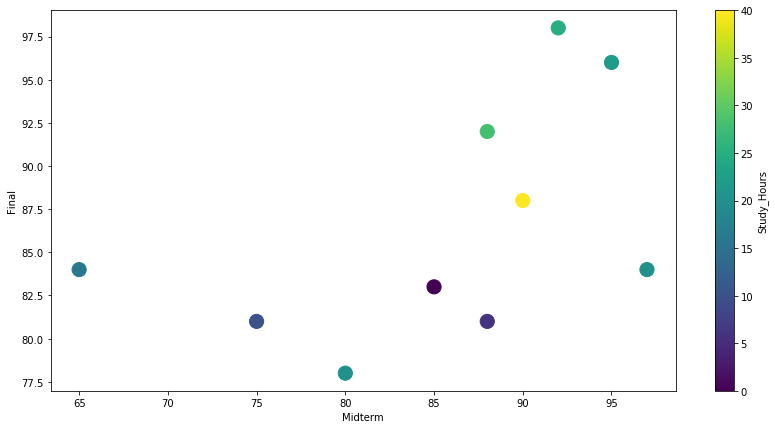

In [27]:
fig, ax = plt.subplots()
alldata.plot(kind='scatter', x='Midterm', y='Final', s=200, c='Study_Hours', cmap='viridis', ax=ax, figsize=(14,7)) 

# 9. Create Columns

In [28]:
alldata

,SID,First,Last,Midterm,Final,Study_Hours,Activity,Major
0,S1,Bart,Simpson,80.0,78.0,20,Sports,Business
1,S2,Rocky,Balboa,75.0,81.0,10,Theater,IT
2,S3,Janis,Joplin,90.0,88.0,40,Band,IT
3,S4,Betty,Crocker,88.0,81.0,6,Band,Business
4,S5,Jane,Goodall,92.0,98.0,25,Sleeping,English
5,S6,Sigmund,Freud,65.0,84.0,16,Sports,Business
6,S7,Bob,Dylan,97.0,84.0,20,Theater,Biology
7,S8,Jimi,Hendrix,85.0,83.0,0,Sports,English
8,S11,Grace,Hopper,95.0,96.0,22,Sports,Biology
9,S12,Henrietta,Lacks,88.0,92.0,28,Theater,English


## Class Score

In [29]:
alldata['Class_Score'] = round(((alldata['Midterm'] + alldata['Final'])/2),2)
alldata

,SID,First,Last,Midterm,Final,Study_Hours,Activity,Major,Class_Score
0,S1,Bart,Simpson,80.0,78.0,20,Sports,Business,79.0
1,S2,Rocky,Balboa,75.0,81.0,10,Theater,IT,78.0
2,S3,Janis,Joplin,90.0,88.0,40,Band,IT,89.0
3,S4,Betty,Crocker,88.0,81.0,6,Band,Business,84.5
4,S5,Jane,Goodall,92.0,98.0,25,Sleeping,English,95.0
5,S6,Sigmund,Freud,65.0,84.0,16,Sports,Business,74.5
6,S7,Bob,Dylan,97.0,84.0,20,Theater,Biology,90.5
7,S8,Jimi,Hendrix,85.0,83.0,0,Sports,English,84.0
8,S11,Grace,Hopper,95.0,96.0,22,Sports,Biology,95.5
9,S12,Henrietta,Lacks,88.0,92.0,28,Theater,English,90.0


## Class Grade

In [30]:
alldata.loc[alldata['Class_Score'] < 60, 'Class_Grade'] = 'F'
alldata.loc[((alldata['Class_Score'] >= 60) & (alldata['Class_Score'] < 70)), 'Class_Grade'] = 'D'
alldata.loc[((alldata['Class_Score'] >= 70) & (alldata['Class_Score'] < 80)), 'Class_Grade'] = 'C'
alldata.loc[((alldata['Class_Score'] >= 80) & (alldata['Class_Score'] < 90)), 'Class_Grade'] = 'B'
alldata.loc[((alldata['Class_Score'] >= 90) & (alldata['Class_Score'] < 100)), 'Class_Grade'] = 'A'
alldata

,SID,First,Last,Midterm,Final,Study_Hours,Activity,Major,Class_Score,Class_Grade
0,S1,Bart,Simpson,80.0,78.0,20,Sports,Business,79.0,C
1,S2,Rocky,Balboa,75.0,81.0,10,Theater,IT,78.0,C
2,S3,Janis,Joplin,90.0,88.0,40,Band,IT,89.0,B
3,S4,Betty,Crocker,88.0,81.0,6,Band,Business,84.5,B
4,S5,Jane,Goodall,92.0,98.0,25,Sleeping,English,95.0,A
5,S6,Sigmund,Freud,65.0,84.0,16,Sports,Business,74.5,C
6,S7,Bob,Dylan,97.0,84.0,20,Theater,Biology,90.5,A
7,S8,Jimi,Hendrix,85.0,83.0,0,Sports,English,84.0,B
8,S11,Grace,Hopper,95.0,96.0,22,Sports,Biology,95.5,A
9,S12,Henrietta,Lacks,88.0,92.0,28,Theater,English,90.0,A


## Full Name

In [31]:
alldata['Full_Name'] = alldata['First'] + " " + alldata['Last']
alldata

,SID,First,Last,Midterm,Final,Study_Hours,Activity,Major,Class_Score,Class_Grade,Full_Name
0,S1,Bart,Simpson,80.0,78.0,20,Sports,Business,79.0,C,Bart Simpson
1,S2,Rocky,Balboa,75.0,81.0,10,Theater,IT,78.0,C,Rocky Balboa
2,S3,Janis,Joplin,90.0,88.0,40,Band,IT,89.0,B,Janis Joplin
3,S4,Betty,Crocker,88.0,81.0,6,Band,Business,84.5,B,Betty Crocker
4,S5,Jane,Goodall,92.0,98.0,25,Sleeping,English,95.0,A,Jane Goodall
5,S6,Sigmund,Freud,65.0,84.0,16,Sports,Business,74.5,C,Sigmund Freud
6,S7,Bob,Dylan,97.0,84.0,20,Theater,Biology,90.5,A,Bob Dylan
7,S8,Jimi,Hendrix,85.0,83.0,0,Sports,English,84.0,B,Jimi Hendrix
8,S11,Grace,Hopper,95.0,96.0,22,Sports,Biology,95.5,A,Grace Hopper
9,S12,Henrietta,Lacks,88.0,92.0,28,Theater,English,90.0,A,Henrietta Lacks


# <font color='red'>Try It!</font>
## Create School Column with a Value of DU

In [32]:
alldata['School'] = 'DU'
alldata

,SID,First,Last,Midterm,Final,Study_Hours,Activity,Major,Class_Score,Class_Grade,Full_Name,School
0,S1,Bart,Simpson,80.0,78.0,20,Sports,Business,79.0,C,Bart Simpson,DU
1,S2,Rocky,Balboa,75.0,81.0,10,Theater,IT,78.0,C,Rocky Balboa,DU
2,S3,Janis,Joplin,90.0,88.0,40,Band,IT,89.0,B,Janis Joplin,DU
3,S4,Betty,Crocker,88.0,81.0,6,Band,Business,84.5,B,Betty Crocker,DU
4,S5,Jane,Goodall,92.0,98.0,25,Sleeping,English,95.0,A,Jane Goodall,DU
5,S6,Sigmund,Freud,65.0,84.0,16,Sports,Business,74.5,C,Sigmund Freud,DU
6,S7,Bob,Dylan,97.0,84.0,20,Theater,Biology,90.5,A,Bob Dylan,DU
7,S8,Jimi,Hendrix,85.0,83.0,0,Sports,English,84.0,B,Jimi Hendrix,DU
8,S11,Grace,Hopper,95.0,96.0,22,Sports,Biology,95.5,A,Grace Hopper,DU
9,S12,Henrietta,Lacks,88.0,92.0,28,Theater,English,90.0,A,Henrietta Lacks,DU


## Reorder Columns

In [33]:
columnnames = alldata.columns.tolist()
columnnames

['SID',
 'First',
 'Last',
 'Midterm',
 'Final',
 'Study_Hours',
 'Activity',
 'Major',
 'Class_Score',
 'Class_Grade',
 'Full_Name',
 'School']

In [34]:
columnnames = ['SID','School','First','Last','Full_Name','Midterm','Final','Class_Score','Class_Grade','Study_Hours','Activity','Major']

In [35]:
alldata = alldata[columnnames]
alldata

,SID,School,First,Last,Full_Name,Midterm,Final,Class_Score,Class_Grade,Study_Hours,Activity,Major
0,S1,DU,Bart,Simpson,Bart Simpson,80.0,78.0,79.0,C,20,Sports,Business
1,S2,DU,Rocky,Balboa,Rocky Balboa,75.0,81.0,78.0,C,10,Theater,IT
2,S3,DU,Janis,Joplin,Janis Joplin,90.0,88.0,89.0,B,40,Band,IT
3,S4,DU,Betty,Crocker,Betty Crocker,88.0,81.0,84.5,B,6,Band,Business
4,S5,DU,Jane,Goodall,Jane Goodall,92.0,98.0,95.0,A,25,Sleeping,English
5,S6,DU,Sigmund,Freud,Sigmund Freud,65.0,84.0,74.5,C,16,Sports,Business
6,S7,DU,Bob,Dylan,Bob Dylan,97.0,84.0,90.5,A,20,Theater,Biology
7,S8,DU,Jimi,Hendrix,Jimi Hendrix,85.0,83.0,84.0,B,0,Sports,English
8,S11,DU,Grace,Hopper,Grace Hopper,95.0,96.0,95.5,A,22,Sports,Biology
9,S12,DU,Henrietta,Lacks,Henrietta Lacks,88.0,92.0,90.0,A,28,Theater,English


## Rename Columns

In [36]:
alldata.rename(columns = {'Midterm':'Test1','Final':'Test2'}, inplace = True)
alldata

,SID,School,First,Last,Full_Name,Test1,Test2,Class_Score,Class_Grade,Study_Hours,Activity,Major
0,S1,DU,Bart,Simpson,Bart Simpson,80.0,78.0,79.0,C,20,Sports,Business
1,S2,DU,Rocky,Balboa,Rocky Balboa,75.0,81.0,78.0,C,10,Theater,IT
2,S3,DU,Janis,Joplin,Janis Joplin,90.0,88.0,89.0,B,40,Band,IT
3,S4,DU,Betty,Crocker,Betty Crocker,88.0,81.0,84.5,B,6,Band,Business
4,S5,DU,Jane,Goodall,Jane Goodall,92.0,98.0,95.0,A,25,Sleeping,English
5,S6,DU,Sigmund,Freud,Sigmund Freud,65.0,84.0,74.5,C,16,Sports,Business
6,S7,DU,Bob,Dylan,Bob Dylan,97.0,84.0,90.5,A,20,Theater,Biology
7,S8,DU,Jimi,Hendrix,Jimi Hendrix,85.0,83.0,84.0,B,0,Sports,English
8,S11,DU,Grace,Hopper,Grace Hopper,95.0,96.0,95.5,A,22,Sports,Biology
9,S12,DU,Henrietta,Lacks,Henrietta Lacks,88.0,92.0,90.0,A,28,Theater,English


# 10. Select Data

## Slicing by Row Index

In [37]:
alldata[:2]

,SID,School,First,Last,Full_Name,Test1,Test2,Class_Score,Class_Grade,Study_Hours,Activity,Major
0,S1,DU,Bart,Simpson,Bart Simpson,80.0,78.0,79.0,C,20,Sports,Business
1,S2,DU,Rocky,Balboa,Rocky Balboa,75.0,81.0,78.0,C,10,Theater,IT


In [38]:
alldata[6:]

,SID,School,First,Last,Full_Name,Test1,Test2,Class_Score,Class_Grade,Study_Hours,Activity,Major
6,S7,DU,Bob,Dylan,Bob Dylan,97.0,84.0,90.5,A,20,Theater,Biology
7,S8,DU,Jimi,Hendrix,Jimi Hendrix,85.0,83.0,84.0,B,0,Sports,English
8,S11,DU,Grace,Hopper,Grace Hopper,95.0,96.0,95.5,A,22,Sports,Biology
9,S12,DU,Henrietta,Lacks,Henrietta Lacks,88.0,92.0,90.0,A,28,Theater,English


In [39]:
alldata[-2:]

,SID,School,First,Last,Full_Name,Test1,Test2,Class_Score,Class_Grade,Study_Hours,Activity,Major
8,S11,DU,Grace,Hopper,Grace Hopper,95.0,96.0,95.5,A,22,Sports,Biology
9,S12,DU,Henrietta,Lacks,Henrietta Lacks,88.0,92.0,90.0,A,28,Theater,English


In [40]:
alldata[2:4]

,SID,School,First,Last,Full_Name,Test1,Test2,Class_Score,Class_Grade,Study_Hours,Activity,Major
2,S3,DU,Janis,Joplin,Janis Joplin,90.0,88.0,89.0,B,40,Band,IT
3,S4,DU,Betty,Crocker,Betty Crocker,88.0,81.0,84.5,B,6,Band,Business


## Slicing by Label

In [41]:
alldata['First']

0         Bart
1        Rocky
2        Janis
3        Betty
4         Jane
5      Sigmund
6          Bob
7         Jimi
8        Grace
9    Henrietta
Name: First, dtype: object

In [42]:
alldata['First'].to_frame()

,First
0,Bart
1,Rocky
2,Janis
3,Betty
4,Jane
5,Sigmund
6,Bob
7,Jimi
8,Grace
9,Henrietta


## Selecting by Row and Label

In [43]:
alldata

,SID,School,First,Last,Full_Name,Test1,Test2,Class_Score,Class_Grade,Study_Hours,Activity,Major
0,S1,DU,Bart,Simpson,Bart Simpson,80.0,78.0,79.0,C,20,Sports,Business
1,S2,DU,Rocky,Balboa,Rocky Balboa,75.0,81.0,78.0,C,10,Theater,IT
2,S3,DU,Janis,Joplin,Janis Joplin,90.0,88.0,89.0,B,40,Band,IT
3,S4,DU,Betty,Crocker,Betty Crocker,88.0,81.0,84.5,B,6,Band,Business
4,S5,DU,Jane,Goodall,Jane Goodall,92.0,98.0,95.0,A,25,Sleeping,English
5,S6,DU,Sigmund,Freud,Sigmund Freud,65.0,84.0,74.5,C,16,Sports,Business
6,S7,DU,Bob,Dylan,Bob Dylan,97.0,84.0,90.5,A,20,Theater,Biology
7,S8,DU,Jimi,Hendrix,Jimi Hendrix,85.0,83.0,84.0,B,0,Sports,English
8,S11,DU,Grace,Hopper,Grace Hopper,95.0,96.0,95.5,A,22,Sports,Biology
9,S12,DU,Henrietta,Lacks,Henrietta Lacks,88.0,92.0,90.0,A,28,Theater,English


In [44]:
alldata.loc[2:3,'First']

2    Janis
3    Betty
Name: First, dtype: object

In [45]:
alldata.iloc[2,2]

'Janis'

In [46]:
alldata.iloc[2:4,2]

2    Janis
3    Betty
Name: First, dtype: object

# <font color='red'>Try It!</font>
## Select Last Name of the Last Student in the Dataframe

In [47]:
alldata.loc[9,'Last']

'Lacks'

In [48]:
alldata.iloc[9,3]

'Lacks'

## Using Is In

In [49]:
filtered = alldata[alldata['First'].isin(['Bob'])]
filtered

,SID,School,First,Last,Full_Name,Test1,Test2,Class_Score,Class_Grade,Study_Hours,Activity,Major
6,S7,DU,Bob,Dylan,Bob Dylan,97.0,84.0,90.5,A,20,Theater,Biology


In [50]:
filtered = alldata[alldata['Class_Score'].isin([95])]
filtered

,SID,School,First,Last,Full_Name,Test1,Test2,Class_Score,Class_Grade,Study_Hours,Activity,Major
4,S5,DU,Jane,Goodall,Jane Goodall,92.0,98.0,95.0,A,25,Sleeping,English


## By Value

In [51]:
filtered = alldata[alldata['First'] == 'Bob']
filtered

,SID,School,First,Last,Full_Name,Test1,Test2,Class_Score,Class_Grade,Study_Hours,Activity,Major
6,S7,DU,Bob,Dylan,Bob Dylan,97.0,84.0,90.5,A,20,Theater,Biology


In [52]:
filtered = alldata[(alldata['Class_Score'] >= 90) & (alldata['Major'] == 'Biology')]
filtered

,SID,School,First,Last,Full_Name,Test1,Test2,Class_Score,Class_Grade,Study_Hours,Activity,Major
6,S7,DU,Bob,Dylan,Bob Dylan,97.0,84.0,90.5,A,20,Theater,Biology
8,S11,DU,Grace,Hopper,Grace Hopper,95.0,96.0,95.5,A,22,Sports,Biology


## Using Where

In [53]:
filtered = alldata.where(alldata['Class_Score'] >= 90)
filtered

,SID,School,First,Last,Full_Name,Test1,Test2,Class_Score,Class_Grade,Study_Hours,Activity,Major
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,S5,DU,Jane,Goodall,Jane Goodall,92.0,98.0,95.0,A,25.0,Sleeping,English
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,S7,DU,Bob,Dylan,Bob Dylan,97.0,84.0,90.5,A,20.0,Theater,Biology
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,S11,DU,Grace,Hopper,Grace Hopper,95.0,96.0,95.5,A,22.0,Sports,Biology
9,S12,DU,Henrietta,Lacks,Henrietta Lacks,88.0,92.0,90.0,A,28.0,Theater,English


In [54]:
filtered = alldata[alldata['Class_Score'] >= 90]
filtered

,SID,School,First,Last,Full_Name,Test1,Test2,Class_Score,Class_Grade,Study_Hours,Activity,Major
4,S5,DU,Jane,Goodall,Jane Goodall,92.0,98.0,95.0,A,25,Sleeping,English
6,S7,DU,Bob,Dylan,Bob Dylan,97.0,84.0,90.5,A,20,Theater,Biology
8,S11,DU,Grace,Hopper,Grace Hopper,95.0,96.0,95.5,A,22,Sports,Biology
9,S12,DU,Henrietta,Lacks,Henrietta Lacks,88.0,92.0,90.0,A,28,Theater,English


# <font color='red'>Try It!</font>
## Select Students with Class Grade of C

In [55]:
filtered = alldata[alldata['Class_Grade'] == 'C']
filtered

,SID,School,First,Last,Full_Name,Test1,Test2,Class_Score,Class_Grade,Study_Hours,Activity,Major
0,S1,DU,Bart,Simpson,Bart Simpson,80.0,78.0,79.0,C,20,Sports,Business
1,S2,DU,Rocky,Balboa,Rocky Balboa,75.0,81.0,78.0,C,10,Theater,IT
5,S6,DU,Sigmund,Freud,Sigmund Freud,65.0,84.0,74.5,C,16,Sports,Business


# 11. Replacing Data

In [56]:
alldata

,SID,School,First,Last,Full_Name,Test1,Test2,Class_Score,Class_Grade,Study_Hours,Activity,Major
0,S1,DU,Bart,Simpson,Bart Simpson,80.0,78.0,79.0,C,20,Sports,Business
1,S2,DU,Rocky,Balboa,Rocky Balboa,75.0,81.0,78.0,C,10,Theater,IT
2,S3,DU,Janis,Joplin,Janis Joplin,90.0,88.0,89.0,B,40,Band,IT
3,S4,DU,Betty,Crocker,Betty Crocker,88.0,81.0,84.5,B,6,Band,Business
4,S5,DU,Jane,Goodall,Jane Goodall,92.0,98.0,95.0,A,25,Sleeping,English
5,S6,DU,Sigmund,Freud,Sigmund Freud,65.0,84.0,74.5,C,16,Sports,Business
6,S7,DU,Bob,Dylan,Bob Dylan,97.0,84.0,90.5,A,20,Theater,Biology
7,S8,DU,Jimi,Hendrix,Jimi Hendrix,85.0,83.0,84.0,B,0,Sports,English
8,S11,DU,Grace,Hopper,Grace Hopper,95.0,96.0,95.5,A,22,Sports,Biology
9,S12,DU,Henrietta,Lacks,Henrietta Lacks,88.0,92.0,90.0,A,28,Theater,English


In [57]:
alldata.iloc[6,2] = 'Robert'
alldata

,SID,School,First,Last,Full_Name,Test1,Test2,Class_Score,Class_Grade,Study_Hours,Activity,Major
0,S1,DU,Bart,Simpson,Bart Simpson,80.0,78.0,79.0,C,20,Sports,Business
1,S2,DU,Rocky,Balboa,Rocky Balboa,75.0,81.0,78.0,C,10,Theater,IT
2,S3,DU,Janis,Joplin,Janis Joplin,90.0,88.0,89.0,B,40,Band,IT
3,S4,DU,Betty,Crocker,Betty Crocker,88.0,81.0,84.5,B,6,Band,Business
4,S5,DU,Jane,Goodall,Jane Goodall,92.0,98.0,95.0,A,25,Sleeping,English
5,S6,DU,Sigmund,Freud,Sigmund Freud,65.0,84.0,74.5,C,16,Sports,Business
6,S7,DU,Robert,Dylan,Bob Dylan,97.0,84.0,90.5,A,20,Theater,Biology
7,S8,DU,Jimi,Hendrix,Jimi Hendrix,85.0,83.0,84.0,B,0,Sports,English
8,S11,DU,Grace,Hopper,Grace Hopper,95.0,96.0,95.5,A,22,Sports,Biology
9,S12,DU,Henrietta,Lacks,Henrietta Lacks,88.0,92.0,90.0,A,28,Theater,English


In [58]:
alldata.loc[alldata['First']=='Robert', 'First'] = 'Bob'
alldata

,SID,School,First,Last,Full_Name,Test1,Test2,Class_Score,Class_Grade,Study_Hours,Activity,Major
0,S1,DU,Bart,Simpson,Bart Simpson,80.0,78.0,79.0,C,20,Sports,Business
1,S2,DU,Rocky,Balboa,Rocky Balboa,75.0,81.0,78.0,C,10,Theater,IT
2,S3,DU,Janis,Joplin,Janis Joplin,90.0,88.0,89.0,B,40,Band,IT
3,S4,DU,Betty,Crocker,Betty Crocker,88.0,81.0,84.5,B,6,Band,Business
4,S5,DU,Jane,Goodall,Jane Goodall,92.0,98.0,95.0,A,25,Sleeping,English
5,S6,DU,Sigmund,Freud,Sigmund Freud,65.0,84.0,74.5,C,16,Sports,Business
6,S7,DU,Bob,Dylan,Bob Dylan,97.0,84.0,90.5,A,20,Theater,Biology
7,S8,DU,Jimi,Hendrix,Jimi Hendrix,85.0,83.0,84.0,B,0,Sports,English
8,S11,DU,Grace,Hopper,Grace Hopper,95.0,96.0,95.5,A,22,Sports,Biology
9,S12,DU,Henrietta,Lacks,Henrietta Lacks,88.0,92.0,90.0,A,28,Theater,English


# <font color='red'>Try It!</font>
## Change Jimi Hendrix's First Name to James

In [59]:
alldata.loc[alldata['First']=='Jimi', 'First'] = 'James'
alldata

,SID,School,First,Last,Full_Name,Test1,Test2,Class_Score,Class_Grade,Study_Hours,Activity,Major
0,S1,DU,Bart,Simpson,Bart Simpson,80.0,78.0,79.0,C,20,Sports,Business
1,S2,DU,Rocky,Balboa,Rocky Balboa,75.0,81.0,78.0,C,10,Theater,IT
2,S3,DU,Janis,Joplin,Janis Joplin,90.0,88.0,89.0,B,40,Band,IT
3,S4,DU,Betty,Crocker,Betty Crocker,88.0,81.0,84.5,B,6,Band,Business
4,S5,DU,Jane,Goodall,Jane Goodall,92.0,98.0,95.0,A,25,Sleeping,English
5,S6,DU,Sigmund,Freud,Sigmund Freud,65.0,84.0,74.5,C,16,Sports,Business
6,S7,DU,Bob,Dylan,Bob Dylan,97.0,84.0,90.5,A,20,Theater,Biology
7,S8,DU,James,Hendrix,Jimi Hendrix,85.0,83.0,84.0,B,0,Sports,English
8,S11,DU,Grace,Hopper,Grace Hopper,95.0,96.0,95.5,A,22,Sports,Biology
9,S12,DU,Henrietta,Lacks,Henrietta Lacks,88.0,92.0,90.0,A,28,Theater,English


# <font color='red'>Try It!</font>
## Update Full Name Too

In [60]:
alldata.loc[alldata['Full_Name']=='Jimi Hendrix', 'Full_Name'] = 'James Hendrix'
alldata

,SID,School,First,Last,Full_Name,Test1,Test2,Class_Score,Class_Grade,Study_Hours,Activity,Major
0,S1,DU,Bart,Simpson,Bart Simpson,80.0,78.0,79.0,C,20,Sports,Business
1,S2,DU,Rocky,Balboa,Rocky Balboa,75.0,81.0,78.0,C,10,Theater,IT
2,S3,DU,Janis,Joplin,Janis Joplin,90.0,88.0,89.0,B,40,Band,IT
3,S4,DU,Betty,Crocker,Betty Crocker,88.0,81.0,84.5,B,6,Band,Business
4,S5,DU,Jane,Goodall,Jane Goodall,92.0,98.0,95.0,A,25,Sleeping,English
5,S6,DU,Sigmund,Freud,Sigmund Freud,65.0,84.0,74.5,C,16,Sports,Business
6,S7,DU,Bob,Dylan,Bob Dylan,97.0,84.0,90.5,A,20,Theater,Biology
7,S8,DU,James,Hendrix,James Hendrix,85.0,83.0,84.0,B,0,Sports,English
8,S11,DU,Grace,Hopper,Grace Hopper,95.0,96.0,95.5,A,22,Sports,Biology
9,S12,DU,Henrietta,Lacks,Henrietta Lacks,88.0,92.0,90.0,A,28,Theater,English


In [61]:
alldata['Full_Name'] = alldata['First'] + " " + alldata['Last']
alldata

,SID,School,First,Last,Full_Name,Test1,Test2,Class_Score,Class_Grade,Study_Hours,Activity,Major
0,S1,DU,Bart,Simpson,Bart Simpson,80.0,78.0,79.0,C,20,Sports,Business
1,S2,DU,Rocky,Balboa,Rocky Balboa,75.0,81.0,78.0,C,10,Theater,IT
2,S3,DU,Janis,Joplin,Janis Joplin,90.0,88.0,89.0,B,40,Band,IT
3,S4,DU,Betty,Crocker,Betty Crocker,88.0,81.0,84.5,B,6,Band,Business
4,S5,DU,Jane,Goodall,Jane Goodall,92.0,98.0,95.0,A,25,Sleeping,English
5,S6,DU,Sigmund,Freud,Sigmund Freud,65.0,84.0,74.5,C,16,Sports,Business
6,S7,DU,Bob,Dylan,Bob Dylan,97.0,84.0,90.5,A,20,Theater,Biology
7,S8,DU,James,Hendrix,James Hendrix,85.0,83.0,84.0,B,0,Sports,English
8,S11,DU,Grace,Hopper,Grace Hopper,95.0,96.0,95.5,A,22,Sports,Biology
9,S12,DU,Henrietta,Lacks,Henrietta Lacks,88.0,92.0,90.0,A,28,Theater,English


# 12. Sort Dataframe

In [62]:
alldata = alldata.sort_values(by=['Class_Grade', 'Class_Score'], ascending=[True,False])
alldata.reset_index(drop=True, inplace=True)
alldata

,SID,School,First,Last,Full_Name,Test1,Test2,Class_Score,Class_Grade,Study_Hours,Activity,Major
0,S11,DU,Grace,Hopper,Grace Hopper,95.0,96.0,95.5,A,22,Sports,Biology
1,S5,DU,Jane,Goodall,Jane Goodall,92.0,98.0,95.0,A,25,Sleeping,English
2,S7,DU,Bob,Dylan,Bob Dylan,97.0,84.0,90.5,A,20,Theater,Biology
3,S12,DU,Henrietta,Lacks,Henrietta Lacks,88.0,92.0,90.0,A,28,Theater,English
4,S3,DU,Janis,Joplin,Janis Joplin,90.0,88.0,89.0,B,40,Band,IT
5,S4,DU,Betty,Crocker,Betty Crocker,88.0,81.0,84.5,B,6,Band,Business
6,S8,DU,James,Hendrix,James Hendrix,85.0,83.0,84.0,B,0,Sports,English
7,S1,DU,Bart,Simpson,Bart Simpson,80.0,78.0,79.0,C,20,Sports,Business
8,S2,DU,Rocky,Balboa,Rocky Balboa,75.0,81.0,78.0,C,10,Theater,IT
9,S6,DU,Sigmund,Freud,Sigmund Freud,65.0,84.0,74.5,C,16,Sports,Business


# <font color='red'>Try It!</font>
## Sort Dataframe by Study Hours Descending and Reset Index

In [63]:
alldata = alldata.sort_values(by=['Study_Hours'], ascending=False)
alldata.reset_index(drop=True, inplace=True)
alldata

,SID,School,First,Last,Full_Name,Test1,Test2,Class_Score,Class_Grade,Study_Hours,Activity,Major
0,S3,DU,Janis,Joplin,Janis Joplin,90.0,88.0,89.0,B,40,Band,IT
1,S12,DU,Henrietta,Lacks,Henrietta Lacks,88.0,92.0,90.0,A,28,Theater,English
2,S5,DU,Jane,Goodall,Jane Goodall,92.0,98.0,95.0,A,25,Sleeping,English
3,S11,DU,Grace,Hopper,Grace Hopper,95.0,96.0,95.5,A,22,Sports,Biology
4,S7,DU,Bob,Dylan,Bob Dylan,97.0,84.0,90.5,A,20,Theater,Biology
5,S1,DU,Bart,Simpson,Bart Simpson,80.0,78.0,79.0,C,20,Sports,Business
6,S6,DU,Sigmund,Freud,Sigmund Freud,65.0,84.0,74.5,C,16,Sports,Business
7,S2,DU,Rocky,Balboa,Rocky Balboa,75.0,81.0,78.0,C,10,Theater,IT
8,S4,DU,Betty,Crocker,Betty Crocker,88.0,81.0,84.5,B,6,Band,Business
9,S8,DU,James,Hendrix,James Hendrix,85.0,83.0,84.0,B,0,Sports,English


# 13. String Cases

In [64]:
alldata['Class_Grade'] = alldata['Class_Grade'].str.lower()
alldata

,SID,School,First,Last,Full_Name,Test1,Test2,Class_Score,Class_Grade,Study_Hours,Activity,Major
0,S3,DU,Janis,Joplin,Janis Joplin,90.0,88.0,89.0,b,40,Band,IT
1,S12,DU,Henrietta,Lacks,Henrietta Lacks,88.0,92.0,90.0,a,28,Theater,English
2,S5,DU,Jane,Goodall,Jane Goodall,92.0,98.0,95.0,a,25,Sleeping,English
3,S11,DU,Grace,Hopper,Grace Hopper,95.0,96.0,95.5,a,22,Sports,Biology
4,S7,DU,Bob,Dylan,Bob Dylan,97.0,84.0,90.5,a,20,Theater,Biology
5,S1,DU,Bart,Simpson,Bart Simpson,80.0,78.0,79.0,c,20,Sports,Business
6,S6,DU,Sigmund,Freud,Sigmund Freud,65.0,84.0,74.5,c,16,Sports,Business
7,S2,DU,Rocky,Balboa,Rocky Balboa,75.0,81.0,78.0,c,10,Theater,IT
8,S4,DU,Betty,Crocker,Betty Crocker,88.0,81.0,84.5,b,6,Band,Business
9,S8,DU,James,Hendrix,James Hendrix,85.0,83.0,84.0,b,0,Sports,English


In [65]:
alldata['Class_Grade'] = alldata['Class_Grade'].str.upper()
alldata

,SID,School,First,Last,Full_Name,Test1,Test2,Class_Score,Class_Grade,Study_Hours,Activity,Major
0,S3,DU,Janis,Joplin,Janis Joplin,90.0,88.0,89.0,B,40,Band,IT
1,S12,DU,Henrietta,Lacks,Henrietta Lacks,88.0,92.0,90.0,A,28,Theater,English
2,S5,DU,Jane,Goodall,Jane Goodall,92.0,98.0,95.0,A,25,Sleeping,English
3,S11,DU,Grace,Hopper,Grace Hopper,95.0,96.0,95.5,A,22,Sports,Biology
4,S7,DU,Bob,Dylan,Bob Dylan,97.0,84.0,90.5,A,20,Theater,Biology
5,S1,DU,Bart,Simpson,Bart Simpson,80.0,78.0,79.0,C,20,Sports,Business
6,S6,DU,Sigmund,Freud,Sigmund Freud,65.0,84.0,74.5,C,16,Sports,Business
7,S2,DU,Rocky,Balboa,Rocky Balboa,75.0,81.0,78.0,C,10,Theater,IT
8,S4,DU,Betty,Crocker,Betty Crocker,88.0,81.0,84.5,B,6,Band,Business
9,S8,DU,James,Hendrix,James Hendrix,85.0,83.0,84.0,B,0,Sports,English


# <font color='red'>Try It!</font>
## Capitalize Major

In [66]:
alldata['Major'] = alldata['Major'].str.upper()
alldata

,SID,School,First,Last,Full_Name,Test1,Test2,Class_Score,Class_Grade,Study_Hours,Activity,Major
0,S3,DU,Janis,Joplin,Janis Joplin,90.0,88.0,89.0,B,40,Band,IT
1,S12,DU,Henrietta,Lacks,Henrietta Lacks,88.0,92.0,90.0,A,28,Theater,ENGLISH
2,S5,DU,Jane,Goodall,Jane Goodall,92.0,98.0,95.0,A,25,Sleeping,ENGLISH
3,S11,DU,Grace,Hopper,Grace Hopper,95.0,96.0,95.5,A,22,Sports,BIOLOGY
4,S7,DU,Bob,Dylan,Bob Dylan,97.0,84.0,90.5,A,20,Theater,BIOLOGY
5,S1,DU,Bart,Simpson,Bart Simpson,80.0,78.0,79.0,C,20,Sports,BUSINESS
6,S6,DU,Sigmund,Freud,Sigmund Freud,65.0,84.0,74.5,C,16,Sports,BUSINESS
7,S2,DU,Rocky,Balboa,Rocky Balboa,75.0,81.0,78.0,C,10,Theater,IT
8,S4,DU,Betty,Crocker,Betty Crocker,88.0,81.0,84.5,B,6,Band,BUSINESS
9,S8,DU,James,Hendrix,James Hendrix,85.0,83.0,84.0,B,0,Sports,ENGLISH


# 14. Group By

# Single Group and Measure

In [67]:
alldata.groupby(by=['Major'], as_index=False).agg({'Class_Score': [pd.Series.mean]})

,Major,Class_Score
,,mean
0,BIOLOGY,93.000000
1,BUSINESS,79.333333
2,ENGLISH,89.666667
3,IT,83.500000


# Single Group and Multiple Measures

In [68]:
alldata.groupby(by=['Major'], as_index=False).agg({'Class_Score': [pd.Series.min, pd.Series.max, pd.Series.mean, pd.Series.median, pd.Series.count]})

Major Class_Score                              
                    min   max       mean median count
0   BIOLOGY        90.5  95.5  93.000000   93.0   2.0
1  BUSINESS        74.5  84.5  79.333333   79.0   3.0
2   ENGLISH        84.0  95.0  89.666667   90.0   3.0
3        IT        78.0  89.0  83.500000   83.5   2.0

# <font color='red'>Try It!</font>
## Group by Class Grade to Calculate Average Study Hours

In [69]:
alldata.groupby(by=['Class_Grade'], as_index=False).agg({'Study_Hours': pd.Series.mean})

,Class_Grade,Study_Hours
0,A,23.750000
1,B,15.333333
2,C,15.333333


# Multiple Groups and Multiple Measures

In [70]:
groupsmeasures = alldata.groupby(by=['Major','Activity'], as_index=False).agg({'Class_Score': [pd.Series.min, pd.Series.max, pd.Series.mean, pd.Series.median, pd.Series.count]})
groupsmeasures

Major  Activity Class_Score                          
                              min   max   mean median count
0   BIOLOGY    Sports        95.5  95.5  95.50  95.50   1.0
1   BIOLOGY   Theater        90.5  90.5  90.50  90.50   1.0
2  BUSINESS      Band        84.5  84.5  84.50  84.50   1.0
3  BUSINESS    Sports        74.5  79.0  76.75  76.75   2.0
4   ENGLISH  Sleeping        95.0  95.0  95.00  95.00   1.0
5   ENGLISH    Sports        84.0  84.0  84.00  84.00   1.0
6   ENGLISH   Theater        90.0  90.0  90.00  90.00   1.0
7        IT      Band        89.0  89.0  89.00  89.00   1.0
8        IT   Theater        78.0  78.0  78.00  78.00   1.0

## Flatten the MultiIndex

In [71]:
groupsmeasures.columns = ['Major', 'Activity', 'Min', 'Max', 'Mean', 'Median','Count'] 
groupsmeasures

,Major,Activity,Min,Max,Mean,Median,Count
0,BIOLOGY,Sports,95.5,95.5,95.50,95.50,1.0
1,BIOLOGY,Theater,90.5,90.5,90.50,90.50,1.0
2,BUSINESS,Band,84.5,84.5,84.50,84.50,1.0
3,BUSINESS,Sports,74.5,79.0,76.75,76.75,2.0
4,ENGLISH,Sleeping,95.0,95.0,95.00,95.00,1.0
5,ENGLISH,Sports,84.0,84.0,84.00,84.00,1.0
6,ENGLISH,Theater,90.0,90.0,90.00,90.00,1.0
7,IT,Band,89.0,89.0,89.00,89.00,1.0
8,IT,Theater,78.0,78.0,78.00,78.00,1.0


## Quick Plot

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC644FF2E8>,
      dtype=object)

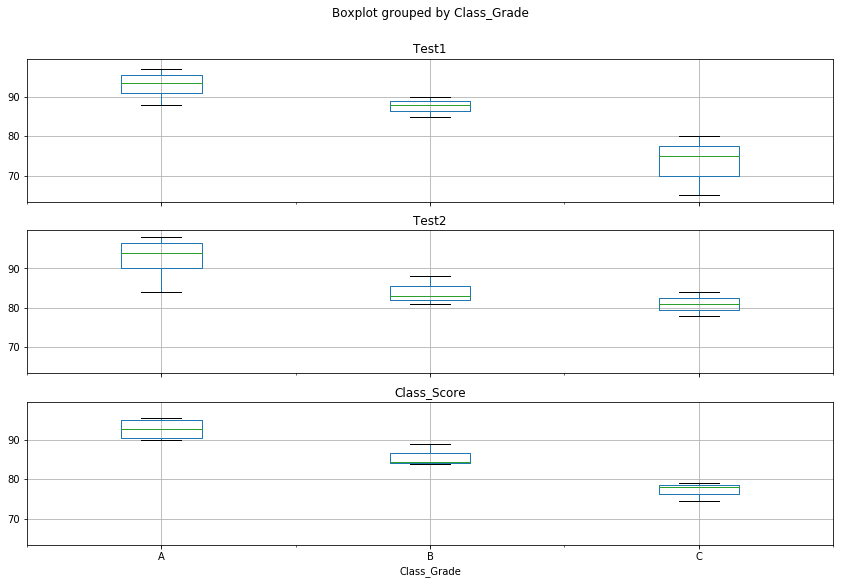

In [72]:
alldata.boxplot(column=['Test1', 'Test2', 'Class_Score'], by='Class_Grade', layout=(3, 1), figsize=(14,9))